# Adult income

This notebook focusses on exploring and cleaning the data.

## 1. Understanding the Problem

This business works on an individual's income, so the **objective** of this project is to determine the level of incomes divided into two classes: incomes exceed $50K per year, or not. Due to the target is known and based on classes, this is a **supervised learning classification problem**.

## 2. Data Understanding

The data comes from the UC Irvine Machine Learning Repository and it is structured, with predictable features and target variable defined.

Structure of the data:

* **Features**:
  * age (Numeric)
  * workclass (Categorical)
  * fnlwgt (Numeric)
  * education (Categorical)
  * education-num (Numeric)
  * marital-status (Categorical)
  * occupation (Categorical)
  * relationship (Categorical)
  * race (Categorical)
  * sex (Categorical)
  * capital-gain (Numeric)
  * capital-loss (Numeric)
  * hours-per-week (Numeric)
  * native-country (Categorical)
* **Target variable**:
  * income (Categorical): >50K or <=50K.

Link: <https://www.kaggle.com/datasets/wenruliu/adult-income-dataset>

## 3. Data exploration

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("ggplot")

### 3.1. Review the state of the data

This is a first glance over the data.

In [3]:
PATH_DATA = os.path.join(os.getenv("PATH_DATA_PROJECTS"), "Tabular", "adult_income")

In [4]:
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
                "hours-per-week", "native-country", "income"]
df_train = pd.read_csv(os.path.join(PATH_DATA, "adult.data"), header = None)
df_train.columns = column_names
print("Shape:", df_train.shape)
df_train.head()

Shape: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
print("Total missing by columns:")
df_train.isnull().sum()

Total missing by columns:


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

#### 3.1.1. Categorical

In [7]:
categorical_features = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]

In [8]:
for c in categorical_features:
    print("\nFeature:", c)
    print(df_train[c].unique())


Feature: workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Feature: education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Feature: marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Feature: occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

Feature: relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Feature: race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

Feature: sex
[' Male' ' F

#### 3.1.2. Numeric

In [9]:
numeric_features = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
df_train[numeric_features].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### 3.1.3. Target variable

In [10]:
target_variable = "income"
df_train[target_variable].unique()

array([' <=50K', ' >50K'], dtype=object)

#### 3.1.4. Conclusion

* There are a plenty of cases to train a model (32561 rows).
* There are no conventional missing values (nan). However, some values are equal to "?", which means unknown.
* The data is composed of a combination of categorical and numeric features.
* The numeric features are in different scales.
* The categorical features do not have an ordinal meaning (ranking).
* Target variable has two possible values (binary classification problem).
* All categorical features and target variables have spaces before each value (left).

### 3.2. Data cleaning

Based on initial conclusions, it is necessary to apply data cleaning.

#### 3.2.1. Categorical

Remove spaces at the beginning and at the end.

In [11]:
for c in categorical_features:
    df_train[c] = df_train[c].str.strip()
    df_train[c] = df_train[c].str.upper()
    
    print("\nFeature:", c)
    print(df_train[c].unique())


Feature: workclass
['STATE-GOV' 'SELF-EMP-NOT-INC' 'PRIVATE' 'FEDERAL-GOV' 'LOCAL-GOV' '?'
 'SELF-EMP-INC' 'WITHOUT-PAY' 'NEVER-WORKED']

Feature: education
['BACHELORS' 'HS-GRAD' '11TH' 'MASTERS' '9TH' 'SOME-COLLEGE' 'ASSOC-ACDM'
 'ASSOC-VOC' '7TH-8TH' 'DOCTORATE' 'PROF-SCHOOL' '5TH-6TH' '10TH'
 '1ST-4TH' 'PRESCHOOL' '12TH']

Feature: marital-status
['NEVER-MARRIED' 'MARRIED-CIV-SPOUSE' 'DIVORCED' 'MARRIED-SPOUSE-ABSENT'
 'SEPARATED' 'MARRIED-AF-SPOUSE' 'WIDOWED']

Feature: occupation
['ADM-CLERICAL' 'EXEC-MANAGERIAL' 'HANDLERS-CLEANERS' 'PROF-SPECIALTY'
 'OTHER-SERVICE' 'SALES' 'CRAFT-REPAIR' 'TRANSPORT-MOVING'
 'FARMING-FISHING' 'MACHINE-OP-INSPCT' 'TECH-SUPPORT' '?'
 'PROTECTIVE-SERV' 'ARMED-FORCES' 'PRIV-HOUSE-SERV']

Feature: relationship
['NOT-IN-FAMILY' 'HUSBAND' 'WIFE' 'OWN-CHILD' 'UNMARRIED' 'OTHER-RELATIVE']

Feature: race
['WHITE' 'BLACK' 'ASIAN-PAC-ISLANDER' 'AMER-INDIAN-ESKIMO' 'OTHER']

Feature: sex
['MALE' 'FEMALE']

Feature: native-country
['UNITED-STATES' 'CUBA' 'JAM

Identify missing values (?).

In [12]:
df_train.replace("?", np.nan, inplace = True)

print("Total missing by columns:")
df_train.isnull().sum()

Total missing by columns:


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Replace missing values with most frequent classes.

>Note: There are several ways to tackle missing values.

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
si = SimpleImputer(strategy = "most_frequent")
ar = si.fit_transform(df_train)
df_train = pd.DataFrame(ar, columns = df_train.columns)

print("Shape:", df_train.shape)
df_train.head()

Shape: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,STATE-GOV,77516,BACHELORS,13,NEVER-MARRIED,ADM-CLERICAL,NOT-IN-FAMILY,WHITE,MALE,2174,0,40,UNITED-STATES,<=50K
1,50,SELF-EMP-NOT-INC,83311,BACHELORS,13,MARRIED-CIV-SPOUSE,EXEC-MANAGERIAL,HUSBAND,WHITE,MALE,0,0,13,UNITED-STATES,<=50K
2,38,PRIVATE,215646,HS-GRAD,9,DIVORCED,HANDLERS-CLEANERS,NOT-IN-FAMILY,WHITE,MALE,0,0,40,UNITED-STATES,<=50K
3,53,PRIVATE,234721,11TH,7,MARRIED-CIV-SPOUSE,HANDLERS-CLEANERS,HUSBAND,BLACK,MALE,0,0,40,UNITED-STATES,<=50K
4,28,PRIVATE,338409,BACHELORS,13,MARRIED-CIV-SPOUSE,PROF-SPECIALTY,WIFE,BLACK,FEMALE,0,0,40,CUBA,<=50K


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  object
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  object
 3   education       32561 non-null  object
 4   education-num   32561 non-null  object
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  object
 11  capital-loss    32561 non-null  object
 12  hours-per-week  32561 non-null  object
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


#### 3.2.2. Target variable

Remove spaces at the beginning and at the end.

In [16]:
df_train[target_variable] = df_train[target_variable].str.strip()
df_train[target_variable].unique()

array(['<=50K', '>50K'], dtype=object)

### 3.3. Exploratory Data Analysis (EDA)

Explore the data distribucion.

#### 3.3.1. Categorical

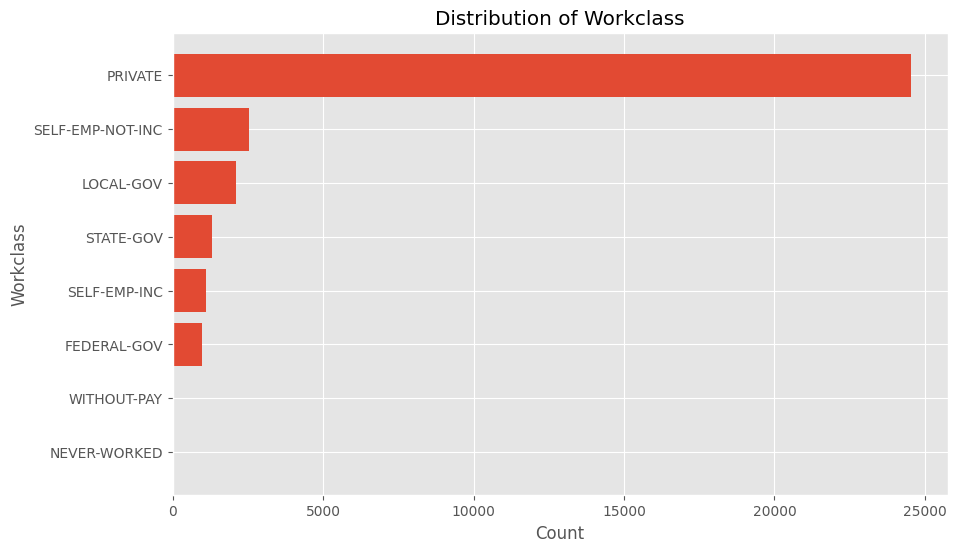

In [17]:
workclass_count = df_train["workclass"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(workclass_count.index, workclass_count.values)
plt.xlabel("Count")
plt.ylabel("Workclass")
plt.title("Distribution of Workclass")
plt.gca().invert_yaxis()
plt.show()

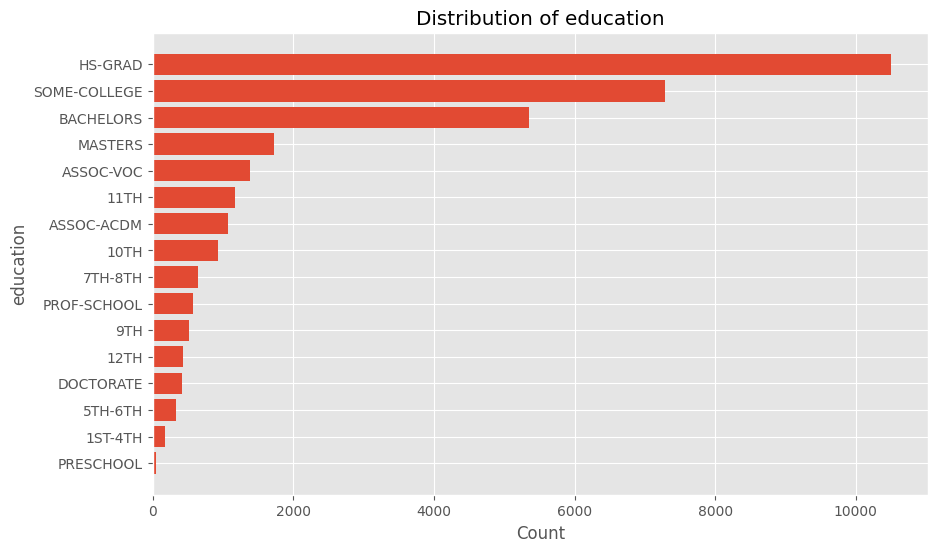

In [18]:
education_count = df_train["education"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(education_count.index, education_count.values)
plt.xlabel("Count")
plt.ylabel("education")
plt.title("Distribution of education")
plt.gca().invert_yaxis()
plt.show()

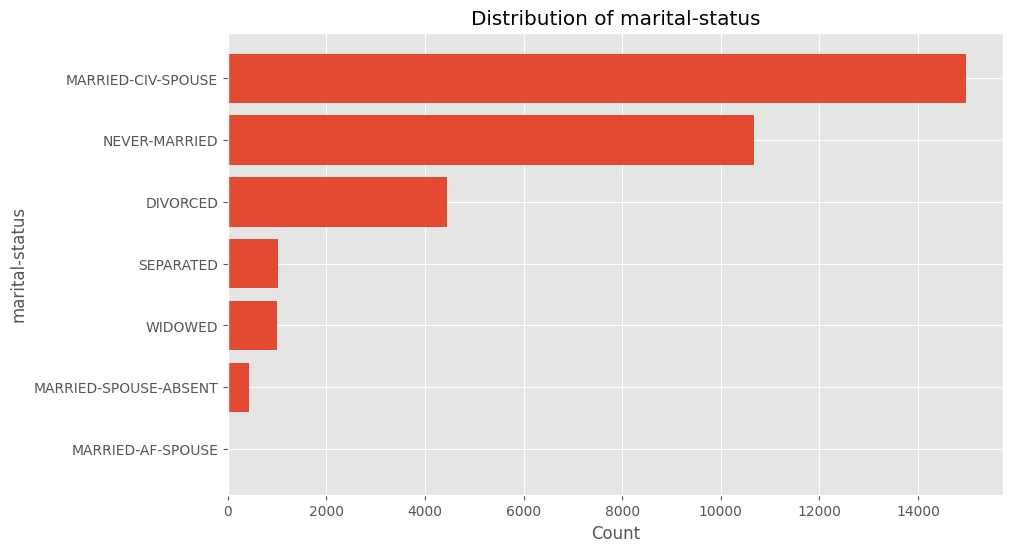

In [19]:
marital_status_count = df_train["marital-status"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(marital_status_count.index, marital_status_count.values)
plt.xlabel("Count")
plt.ylabel("marital-status")
plt.title("Distribution of marital-status")
plt.gca().invert_yaxis()
plt.show()

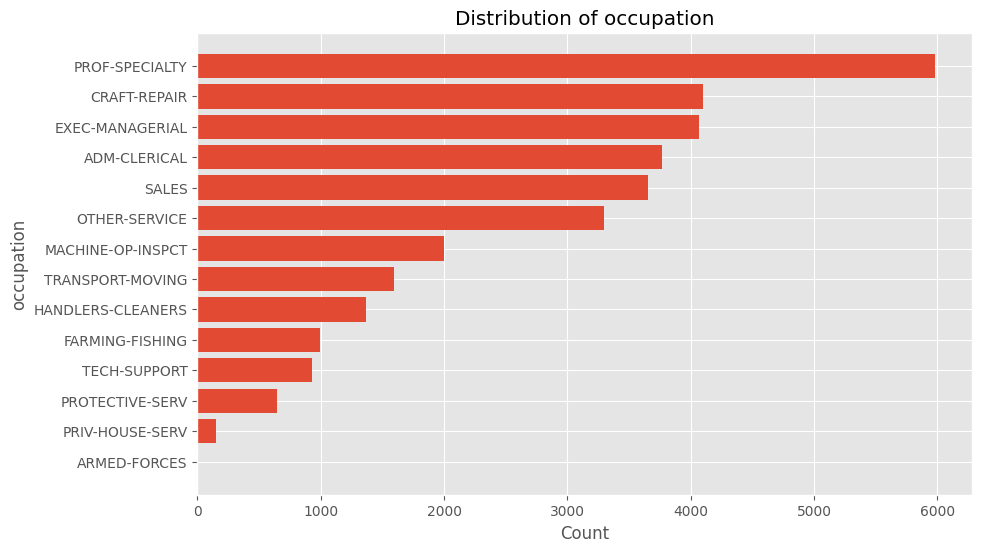

In [20]:
occupation_count = df_train["occupation"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(occupation_count.index, occupation_count.values)
plt.xlabel("Count")
plt.ylabel("occupation")
plt.title("Distribution of occupation")
plt.gca().invert_yaxis()
plt.show()

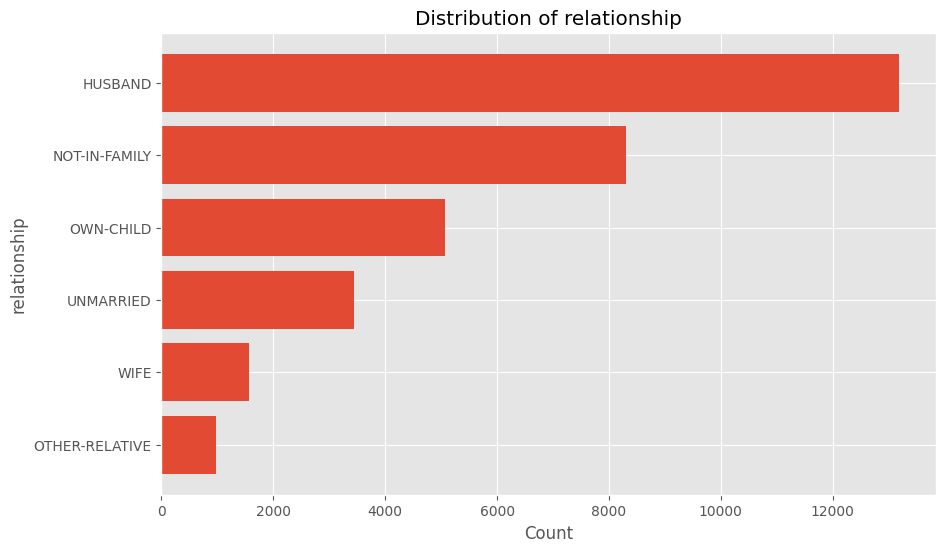

In [21]:
relationship_count = df_train["relationship"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(relationship_count.index, relationship_count.values)
plt.xlabel("Count")
plt.ylabel("relationship")
plt.title("Distribution of relationship")
plt.gca().invert_yaxis()
plt.show()

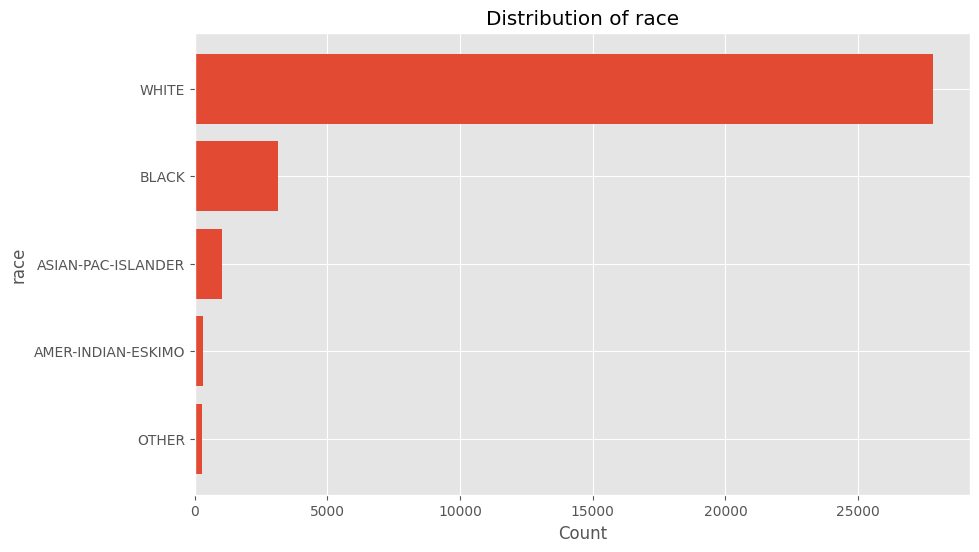

In [22]:
race_count = df_train["race"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(race_count.index, race_count.values)
plt.xlabel("Count")
plt.ylabel("race")
plt.title("Distribution of race")
plt.gca().invert_yaxis()
plt.show()

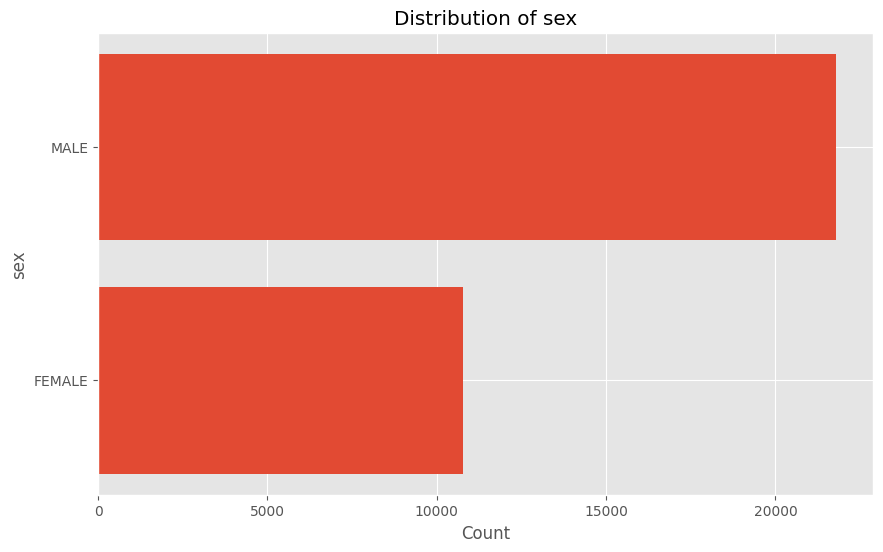

In [23]:
sex_count = df_train["sex"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(sex_count.index, sex_count.values)
plt.xlabel("Count")
plt.ylabel("sex")
plt.title("Distribution of sex")
plt.gca().invert_yaxis()
plt.show()

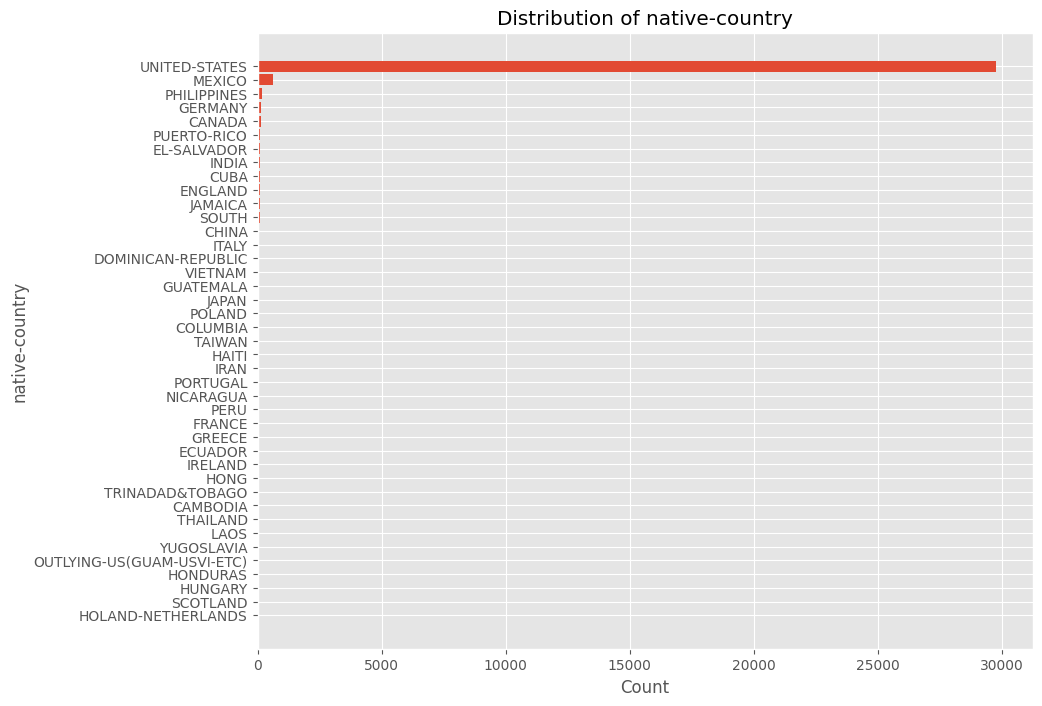

In [24]:
native_country_count = df_train["native-country"].value_counts()

plt.figure(figsize = (10, 8))
plt.barh(native_country_count.index, native_country_count.values)
plt.xlabel("Count")
plt.ylabel("native-country")
plt.title("Distribution of native-country")
plt.gca().invert_yaxis()
plt.show()

#### 3.3.2. Numerical

In [25]:
df_train[numeric_features].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561,32561,32561,32561,32561,32561
unique,73,21648,16,119,92,94
top,36,123011,9,0,0,40
freq,898,13,10501,29849,31042,15217


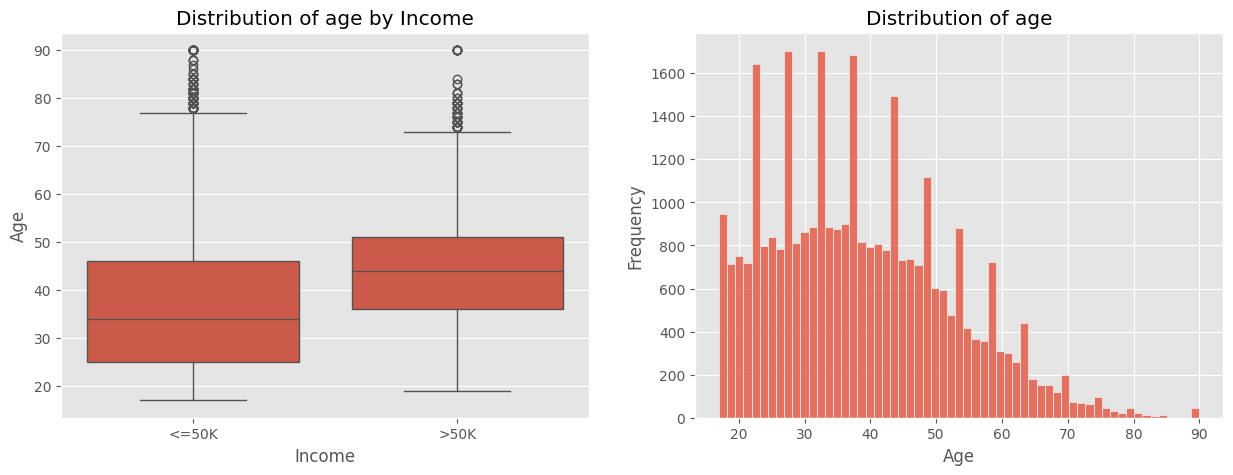

In [26]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(x = "income", y = "age", data = df_train, ax = axs[0])
axs[0].set_xlabel("Income")
axs[0].set_ylabel("Age")
axs[0].set_title("Distribution of age by Income")

sns.histplot(x = "age", data = df_train, ax = axs[1])
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of age")
plt.show()

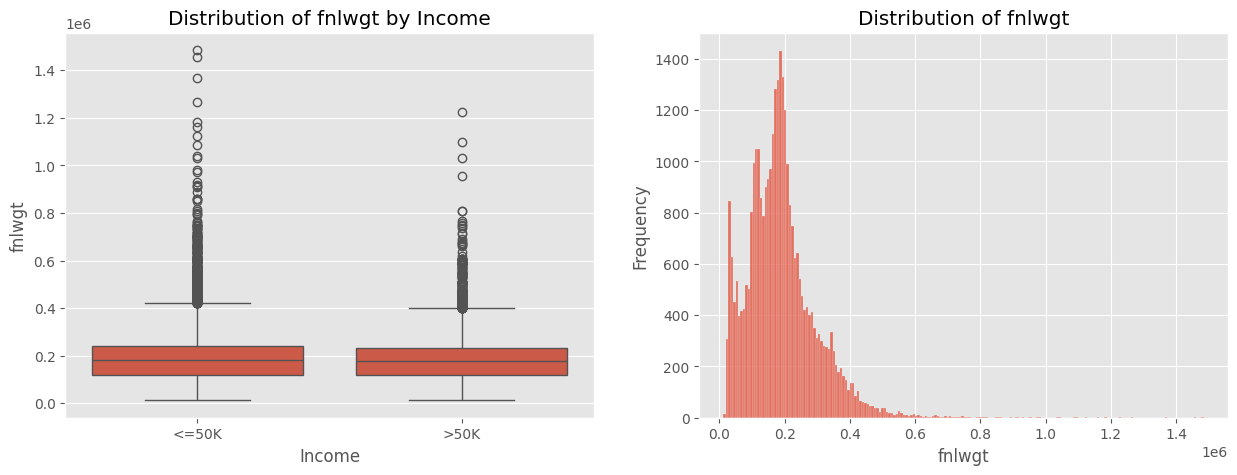

In [27]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(x = "income", y = "fnlwgt", data = df_train, ax = axs[0])
axs[0].set_xlabel("Income")
axs[0].set_ylabel("fnlwgt")
axs[0].set_title("Distribution of fnlwgt by Income")

sns.histplot(x = "fnlwgt", data = df_train, ax = axs[1])
axs[1].set_xlabel("fnlwgt")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of fnlwgt")
plt.show()

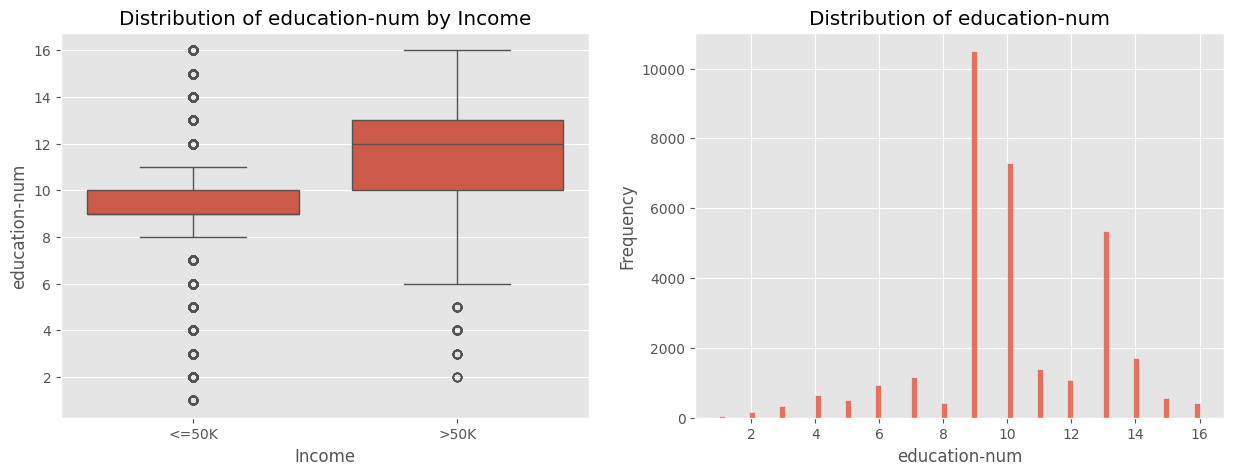

In [28]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(x = "income", y = "education-num", data = df_train, ax = axs[0])
axs[0].set_xlabel("Income")
axs[0].set_ylabel("education-num")
axs[0].set_title("Distribution of education-num by Income")

sns.histplot(x = "education-num", data = df_train, ax = axs[1])
axs[1].set_xlabel("education-num")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of education-num")
plt.show()

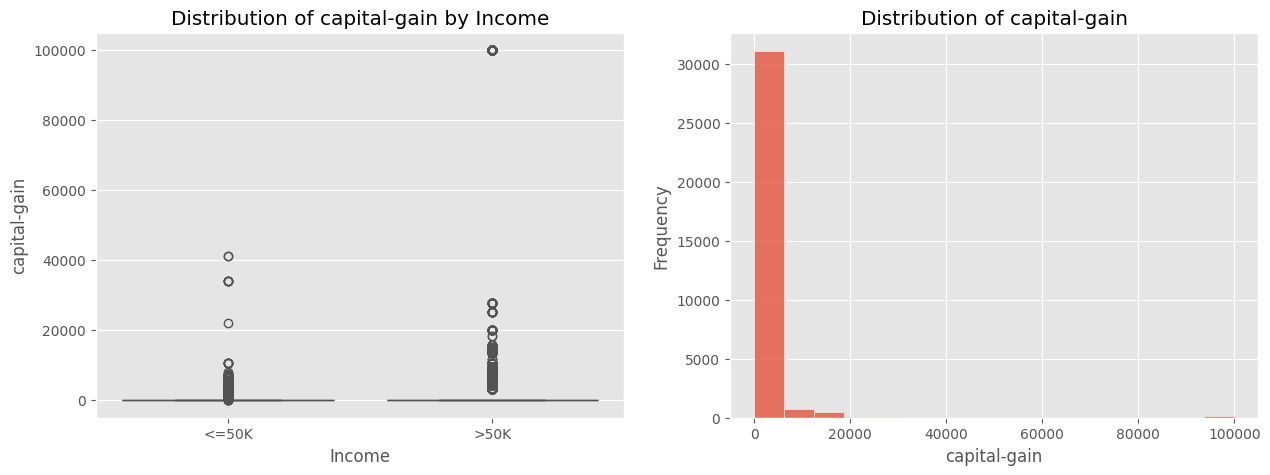

In [29]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(x = "income", y = "capital-gain", data = df_train, ax = axs[0])
axs[0].set_xlabel("Income")
axs[0].set_ylabel("capital-gain")
axs[0].set_title("Distribution of capital-gain by Income")

sns.histplot(x = "capital-gain", data = df_train, ax = axs[1])
axs[1].set_xlabel("capital-gain")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of capital-gain")
plt.show()

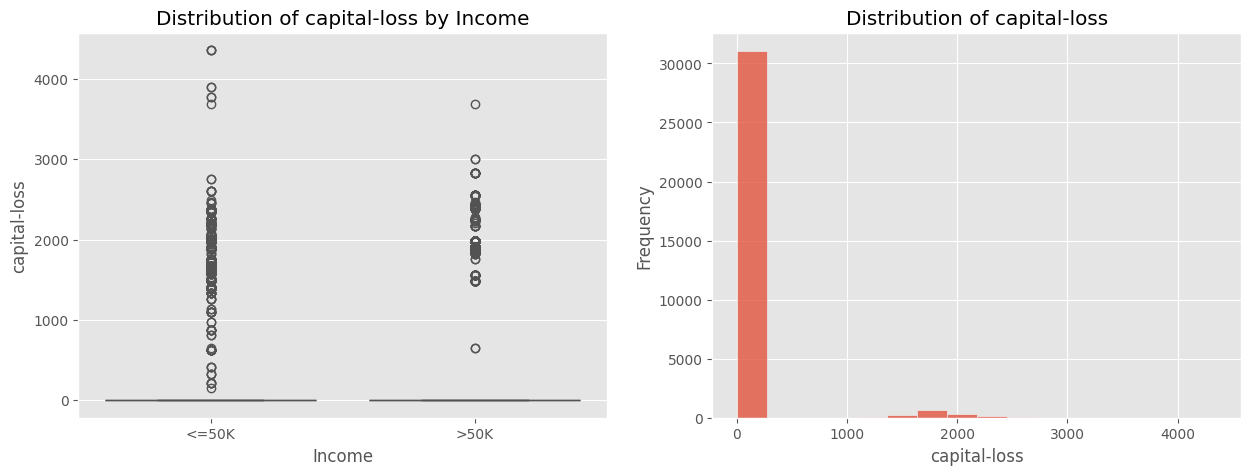

In [30]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(x = "income", y = "capital-loss", data = df_train, ax = axs[0])
axs[0].set_xlabel("Income")
axs[0].set_ylabel("capital-loss")
axs[0].set_title("Distribution of capital-loss by Income")

sns.histplot(x = "capital-loss", data = df_train, ax = axs[1])
axs[1].set_xlabel("capital-loss")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of capital-loss")
plt.show()

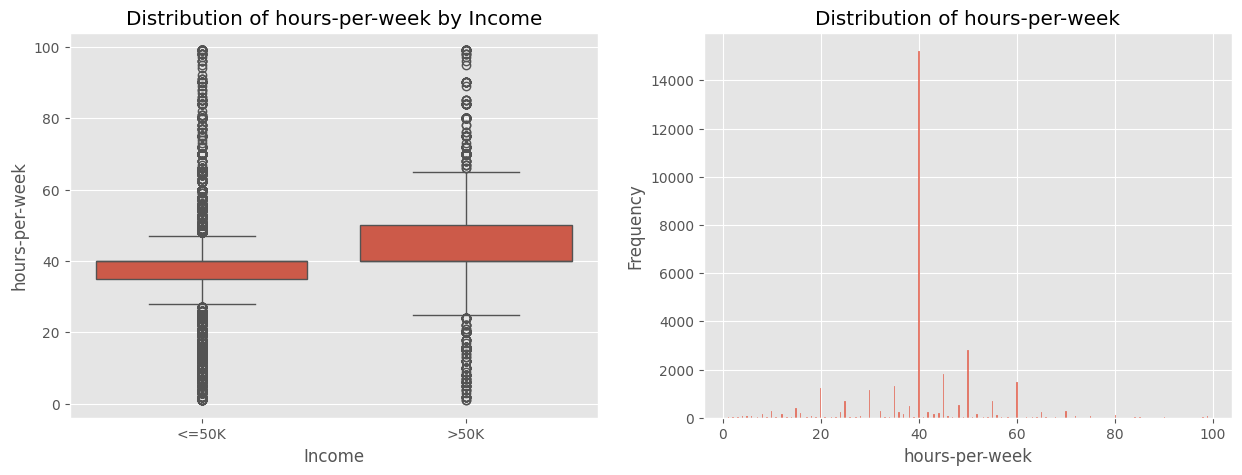

In [31]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(x = "income", y = "hours-per-week", data = df_train, ax = axs[0])
axs[0].set_xlabel("Income")
axs[0].set_ylabel("hours-per-week")
axs[0].set_title("Distribution of hours-per-week by Income")

sns.histplot(x = "hours-per-week", data = df_train, ax = axs[1])
axs[1].set_xlabel("hours-per-week")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of hours-per-week")
plt.show()

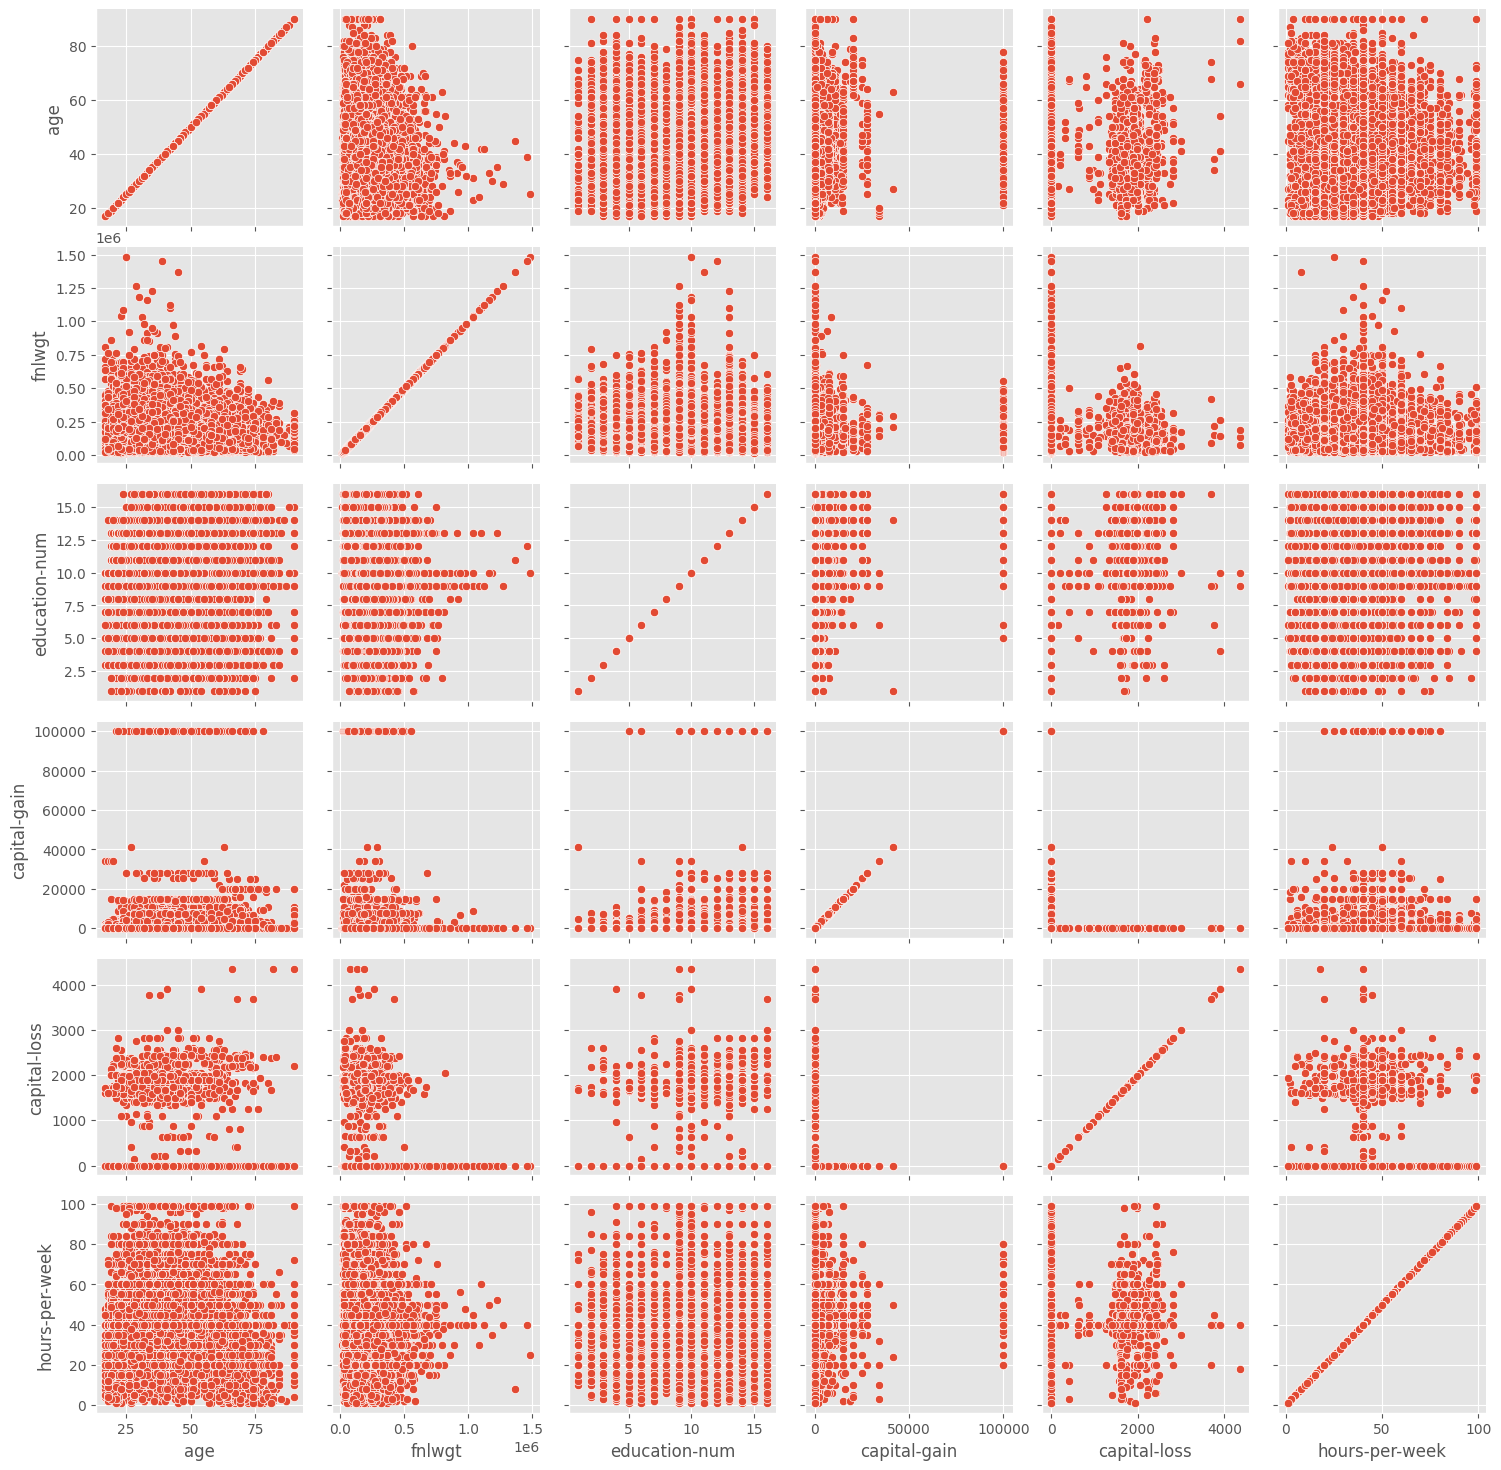

In [32]:
g = sns.PairGrid(df_train[numeric_features])
g.map(sns.scatterplot)

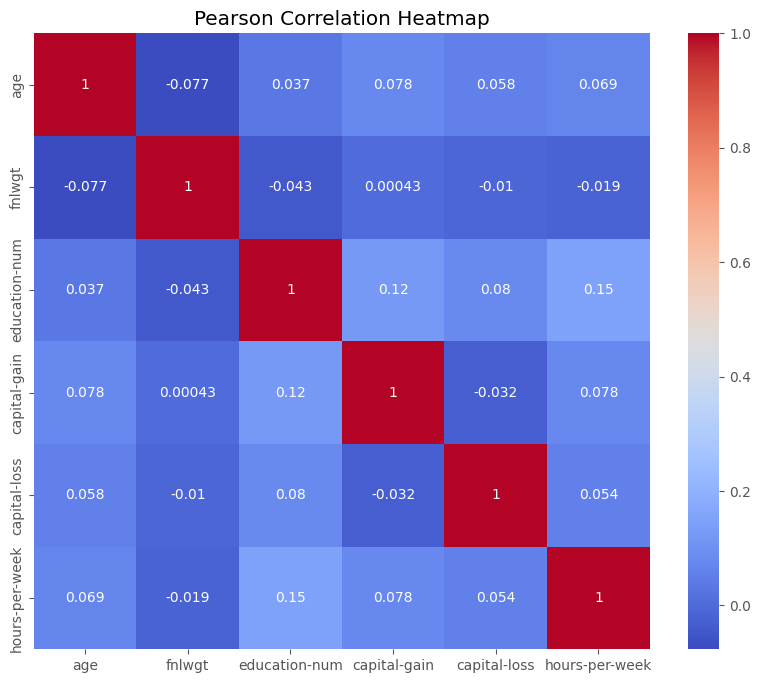

In [33]:
correlation_matrix = df_train[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Pearson Correlation Heatmap')
plt.show()

<Axes: title={'center': 'Numeric features distribution'}, ylabel='Density'>

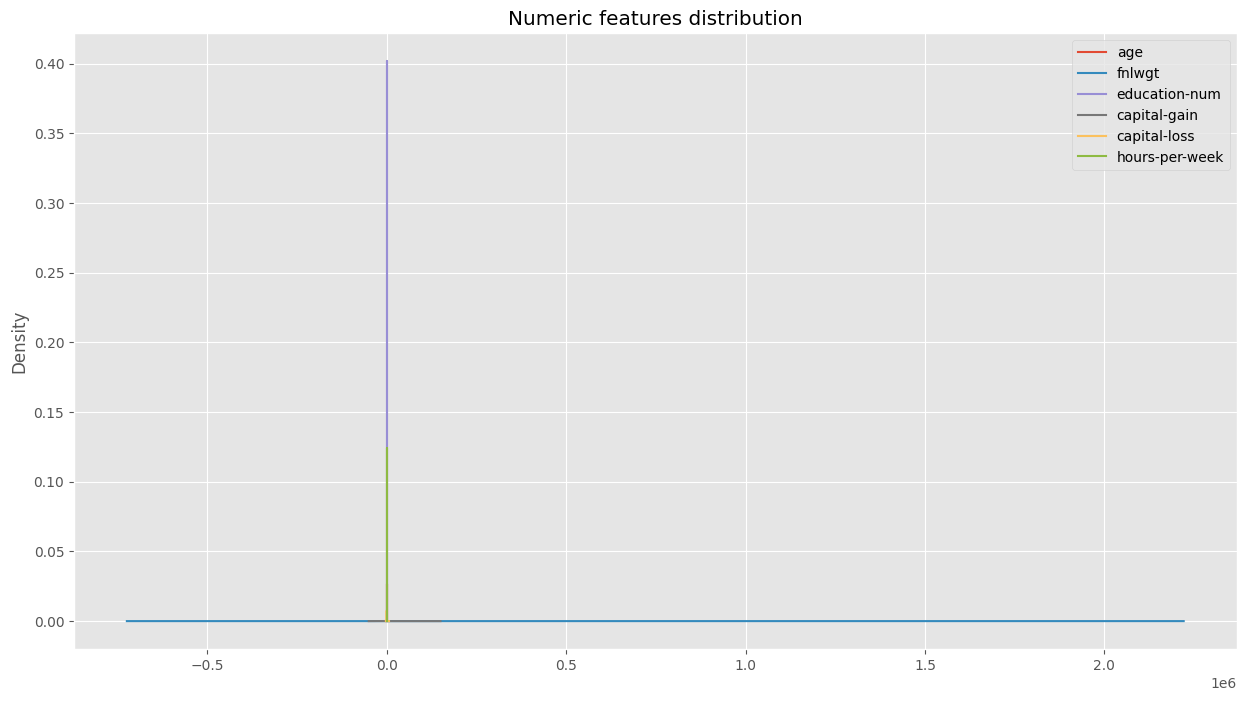

In [34]:
df_train[numeric_features].plot(kind = "kde", figsize = (15, 8), title = "Numeric features distribution")

#### 3.3.3. Target variable

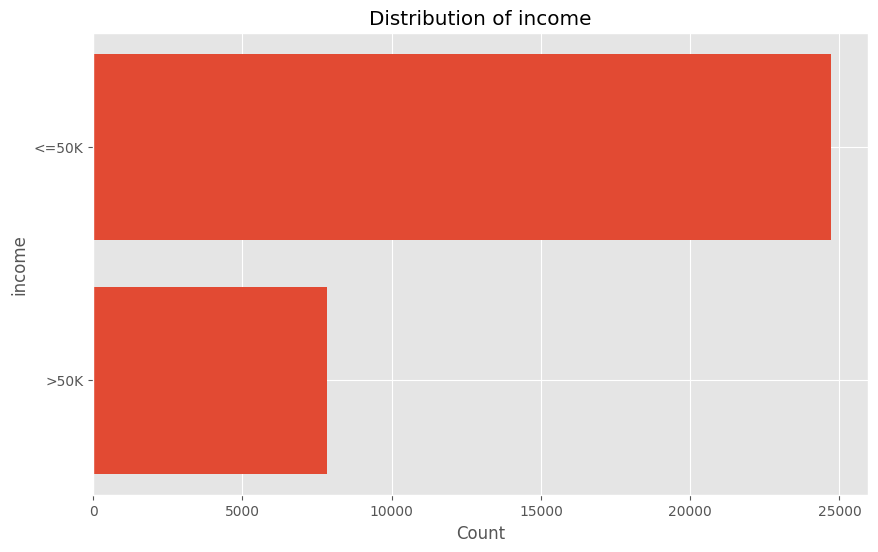

In [35]:
income_count = df_train["income"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(income_count.index, income_count.values)
plt.xlabel("Count")
plt.ylabel("income")
plt.title("Distribution of income")
plt.gca().invert_yaxis()
plt.show()

#### 3.3.4. Conclusion

* For categorical features, all classes are not equally distributed, so there is a imbalance class problem.
* For numeric features, there is no a strong correlation among variables. So, none of them can be removed because of redundancy. Additionally, all of them have many outliers making the data extremely skewed.
* For target variable, classes are not equally distributed, so there is a imbalance class problem.

#### 3.3.5. Save file

In [36]:
path_csv_clean = "adult_train_cleaned.csv"
df_train.to_csv(os.path.join(PATH_DATA, path_csv_clean), index = False)